In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# English and Language Attitudes Survey, IPP

In the month of August I surveyed  roughly 85 students at the Ecuadorian high school where the Peace Corps assigned me. The survey was constructed to gain insight into the potential interest of students in an afterschool English club, and I also hoped to gain some knowledge about attitudes towards English and foreign language learning in general within the student population.
I entered the data into an Excel spreadsheet, imported the sheet into python, and set out to:

1) do some minor data cleaning (though the fact that this is data I manually entered minimizes this process)

2) create a number of functions to run on the data that will be flexible enough to answer multiple questions and generate intelligence I can share with community stakeholders and the Peace Corps

3) create visualizations (using the seaborn library) that I can utilize in presentations to stakeholders and Peace Corps


# Opening up the sheet 
I'll just check out what things look like coming out of my spreadsheet. 
This looks good to me, but I'll follow up with cleaning out the NaN values and replacing them with '.' strings.
The periods work as I will be running through these columns just to look for 'x's.

In [2]:
df = pd.read_csv('IPPSurvey8.15.csv', index_col=0)
df.head()

,Q1,Q2,Q6,Q7,Q8,Q3,Italiano,Ingles,Porto,Catal,Fran,Chin,Japo,Corr,Otro
ID,,,,,,,,,,,,,,,
1,El Guabo,40-60,a veces,definitivamente,después de escuela,hago deberes,NaN,x,NaN,NaN,x,NaN,NaN,NaN,NaN
2,Machala,1-20,a veces,quizás,después de escuela,hago deberes,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN
3,Machala,1-20,a veces,quizás,después de escuela,otro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x
4,Machala,1-20,mucho,probablemente,después de escuela,hago deberes,NaN,x,NaN,NaN,x,NaN,NaN,NaN,NaN
5,Puerto Bolívar,1-20,a veces,probablemente,después de escuela,hago deberes,NaN,x,NaN,NaN,x,NaN,NaN,NaN,NaN


In [3]:
df.fillna('.', inplace=True)
df.head()

,Q1,Q2,Q6,Q7,Q8,Q3,Italiano,Ingles,Porto,Catal,Fran,Chin,Japo,Corr,Otro
ID,,,,,,,,,,,,,,,
1,El Guabo,40-60,a veces,definitivamente,después de escuela,hago deberes,.,x,.,.,x,.,.,.,.
2,Machala,1-20,a veces,quizás,después de escuela,hago deberes,.,x,x,.,.,.,.,.,.
3,Machala,1-20,a veces,quizás,después de escuela,otro,.,.,.,.,.,.,.,.,x
4,Machala,1-20,mucho,probablemente,después de escuela,hago deberes,.,x,.,.,x,.,.,.,.
5,Puerto Bolívar,1-20,a veces,probablemente,después de escuela,hago deberes,.,x,.,.,x,.,.,.,.


# Language Interest Functions
Now I'll start creating a couple of functions to run parts of the data through and answer some questions. The first thing I want to look at is the students' interest in different languages. Foreign language instruction is already a hard subject to generate motivation for in high school students, and if other languages might be more relevant to their lives, this would increase the difficulty.

In [4]:
def single_language_interest(lang, integer=True):
    """lang: a string representing one language
       integer: specifies whether to return a int-True or float-False
       returns: the % of students
       interested in the language"""
    if integer: 
        return int(round((len([i for i in df[lang] if 'x' in i])/len(df[lang])), 2) * 100)
    else:    
        try: return round(len([i for i in df[lang] if 'x' in i])/len(df[lang]), 4) * 100
        except KeyError: return 'not available language'

I'll run the function on Italian first and generate a percentage of students interested in that language. My expectation is that a significant portion of students will be interested - this is based off of interviews I conducted with various students previous to my survey.

In [5]:
print('{}% of students are interested in Italian'.format(single_language_interest('Italiano')))

24% of students are interested in Italian


Here I will make essentially the same function, but I want it to look at student interest in at least one language provided in a group. This is going to be used for looking at how many students express interest in languages associated with a geographical area.

In [6]:
def language_group_interest(langs, integer=False):
    """langs: a list of laguages
       integer: if True, will return an integer, else a float
       returns: the % of students interested in at least one of the
       languages given via langs"""
    count = 0
    for ind, row in df[langs].iterrows():
        if 'x' in [i for i in row]:
            count += 1
    if integer:
        return int(round(count/len(df[langs]), 2) * 100)
    else:
        return (round(count/len(df[langs]), 2))    


# Now I'll make some language groups to examine...
asian_langs = ['Chin', 'Japo', 'Corr']
euro_langs = ['Italiano', 'Catal', 'Fran'] #not including portugese because that could also be Brazilian
english = ['Ingles']

# Plotting..
Now I'll use the seaborn library to make a simple plot visualizing the interest in different language groups and how those compare to English.

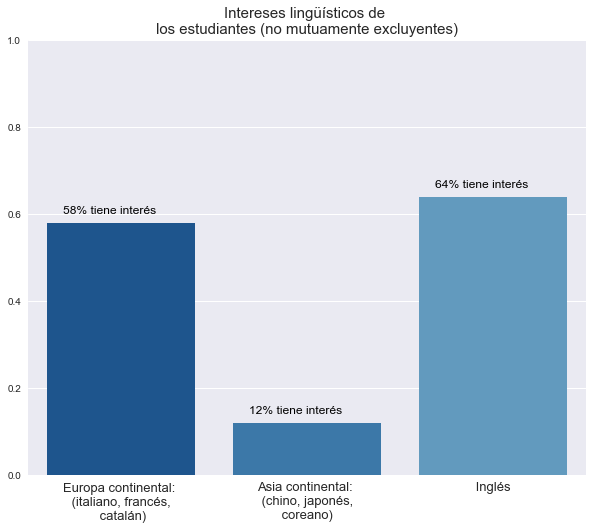

In [8]:
#Plot the language interest at a general level
Y = [language_group_interest(euro_langs), language_group_interest(asian_langs), 
     language_group_interest(english)]
X = ['Europa continental: \n (italiano, francés, \n catalán)', 
     'Asia continental: \n (chino, japonés, \n coreano) ',' Inglés ']
ax = sns.barplot(X, Y, palette=sns.color_palette("Blues_r"))

#Fine tune the plot
sns.set(rc={'figure.figsize':(10,8)})
plt.xticks(rotation=0, fontsize=13)
plt.yticks()
plt.ylim((0, 1))
plt.title('Intereses lingüísticos de \nlos estudiantes (no mutuamente excluyentes)', fontsize=15)

#Annotate the heights onto each bar
for i in ax.patches:
    ax.annotate(str(int(round(i.get_height()*100))) + '% tiene interés',
                (i.get_x() + .09, i.get_height() + .02), color='black')
plt.savefig('english_interest.png')

Now, I want to make a different dataframe that I'll use later. This will represent only students who said they will 'definitely' want to attend an English club

In [9]:
#Making a dataframe of just the students who definitely want to be a part of the club
definites = df[df.Q7 == 'definitivamente']
definites.head()

,Q1,Q2,Q6,Q7,Q8,Q3,Italiano,Ingles,Porto,Catal,Fran,Chin,Japo,Corr,Otro
ID,,,,,,,,,,,,,,,
1,El Guabo,40-60,a veces,definitivamente,después de escuela,hago deberes,.,x,.,.,x,.,.,.,.
14,Puerto Bolívar,1-20,mucho,definitivamente,después de escuela,hago deberes,.,x,x,.,.,.,.,.,.
23,Machala,1-20,mucho,definitivamente,después de escuela,dormir,.,x,.,.,x,.,.,.,.
25,Machala,20-40,a veces,definitivamente,después de escuela,"hago deberes, social",x,x,.,.,x,.,.,.,.
26,Machala,20-40,mucho,definitivamente,receso,"hago deberes, hago deportes",x,x,.,.,.,.,.,.,.


# Afterschool Activities
Now, I'll throw together a function to look at what students are doing after school and whether they would be free to attend an English club, or if too many students have strict obligations after school, such as childcare or work.

In [10]:
def after_school(df, act):
    """df: specify a dataframe
       act: an activity
       returns: the percentage of students in
       the data frame who partake in the given activity"""
    return (round((len([i for i in df.Q3 if act in i])/len(df.Q3))*100, 2))

In [11]:
print('{}% of definite club attendees usually have social obligations after school'
      .format(after_school(definites, 'social')))

17.39% of definite club attendees usually have social obligations after school


I'm going to lay sonme groundwork to use that function to plot out what percentage of students are involved in a few different activities after school. One difficulty I'm facing is that students had the option of slecting multiple after school activities on the survey. For example, students in the table below usually selected more than one option:

In [12]:
df.Q3.tail()

ID
82     hago deberes, hago deportes
83                    hago deberes
84    hago deberes, actividades ec
85     hago deberes, hago deportes
86                    hago deberes
Name: Q3, dtype: object

Therefore, I'll make a list of every activity by itself. Then I can use that list as the X files in a plot.

In [13]:
all_activities = []
for i in df.Q3:
    all_activities.extend(i.split(', '))

print('Here, we can see that we are still stuck with duplicates:\n', all_activities[:10], '\n')
activities = list(set(all_activities)) #get rid of dupes
print('We handled the duplicates, but I still have an "otro" category I would like to ditch:\n', activities, '\n')
activities.remove('otro') # get rid of other
print('Here is what we are left with:\n', activities)

Here, we can see that we are still stuck with duplicates:
 ['hago deberes', 'hago deberes', 'otro', 'hago deberes', 'hago deberes', 'hago deberes', 'cuidar familia', 'hago deberes', 'hago deberes', 'actividades ec'] 

We handled the duplicates, but I still have an "otro" category I would like to ditch:
 ['hago deportes', 'cuidar familia', 'social', 'otro', 'hago deberes', 'actividades ec', 'dormir', 'trabajo'] 

Here is what we are left with:
 ['hago deportes', 'cuidar familia', 'social', 'hago deberes', 'actividades ec', 'dormir', 'trabajo']


In [14]:
#Create the y values for my graph by using my after_school function
act_percents = [after_school(df, i) for i in activities]
#Get a list of the names for the x-axis, adding an indent if the activity is two words long
names = [name.replace(' ', '\n').title() if len(name.split()) == 2 else name.title() for name in activities]

#Here's a test to see what data will go into my graph
print('Here are the percentages for each activity:\n', act_percents, '\n\nAnd here are the names of each activity:\n', names)

Here are the percentages for each activity:
 [18.6, 3.49, 17.44, 84.88, 8.14, 6.98, 6.98] 

And here are the names of each activity:
 ['Hago\nDeportes', 'Cuidar\nFamilia', 'Social', 'Hago\nDeberes', 'Actividades\nEc', 'Dormir', 'Trabajo']


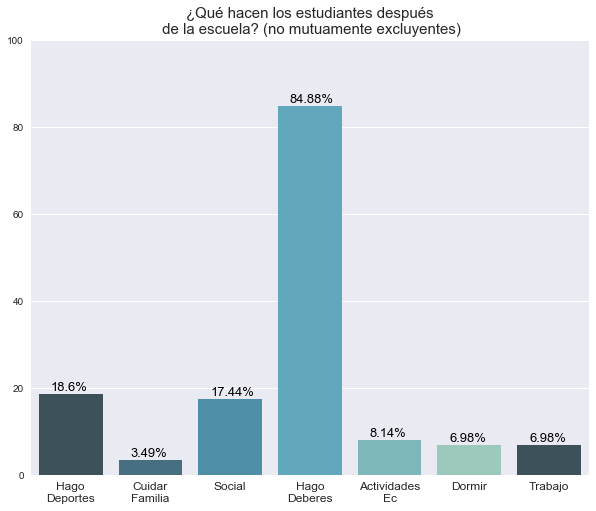

In [15]:
#Put the data into a barplot with seaborn
ax = sns.barplot(names, act_percents, palette=sns.color_palette("GnBu_d"))

#Finetune the plot and add my title
plt.xticks(fontsize=12)
plt.ylim((0, 100))
plt.title('¿Qué hacen los estudiantes después\n de la escuela? (no mutuamente excluyentes)', fontsize=15)

#Annotate each of the bars in the chart
for i in ax.patches:
    ax.annotate(str(i.get_height()) + '%',(i.get_x() + .15, i.get_height() + .7), color='black', fontsize=13)

# Lastly,
I'm just going to make one more function that will be flexible enough to look at answers from different questions and in different dataframes. I'll use this to get any more information I think I could potentially use in presentations or in reports.

In [16]:
def interest_track(dataframe_question, targets, integer=True):
    """dataframe_question: a dataframe object that specifies a question attribute
       targets: a list of target answers
       integer: if True, returns an int, else float with 4 digits
       returns: the % of students
       whose response included at least one of the target responses"""
    count = 0
    for i in dataframe_question:
        for X in targets:
            if X in i:
                count += 1
                break
    if integer: 
        return int(round(count/len(dataframe_question), 2)*100)
    return round(count/len(dataframe_question), 4)*100

In [17]:
#How many students are involved in work OR childcare?
print('{}% of students are involved in work or childcare after school'
     .format(interest_track(df.Q3, ['trabajo', 'cuidar'])))

10% of students are involved in work or childcare after school


In [18]:
#How many students believe that they will use English 'a lot' after high school?
#Do more of those students who are interested in an English club believe they will use English 'a lot'?
print('Of students who are "definitely" interested in a club, {}% believe they will use English "a lot" after graduation\n'
      .format(interest_track(definites.Q6, ['mucho'])))
print('Of students in general, {}% believe they will use English "a lot" after graduation'
      .format(interest_track(df.Q6, ['mucho'])))

Of students who are "definitely" interested in a club, 61% believe they will use English "a lot" after graduation

Of students in general, 30% believe they will use English "a lot" after graduation


In [19]:
#How many students are interested in the english club?
print('{}% of students answered that they would "probably" or "definitely" be interested in attending an English club'
      .format(interest_track(df.Q7, ['definitivamente', 'probablemente'])))

51% of students answered that they would "probably" or "definitely" be interested in attending an English club


In [20]:
#How many students live within 20 minutes of school?
print('{}% of students live within 20 minutes of school'
     .format(interest_track(df.Q2, ['1-20'])))

69% of students live within 20 minutes of school


In [21]:
#Do students who are definitely interested in The English club live near the school?
print('{}% of students who are definitely interested in attending an English club live within 20 minutes of school'
     .format(interest_track(definites.Q2, ['1-20'])))

70% of students who are definitely interested in attending an English club live within 20 minutes of school


In [23]:
definites_close = definites[definites.Q2 == '1-20']

optimum = interest_track(definites_close.Q3, 
               ['social', 'dormir'],
               integer=True)
print('{}% of students who are definitely interested in attending an English club and live within 20 minutes of school are essentially unoccupied after school'
     .format(optimum))

19% of students who are definitely interested in attending an English club and live within 20 minutes of school are essentially unoccupied after school
